<a href="https://colab.research.google.com/github/74obunga/Road-Sign-Prediction-CNN.ipynb/blob/main/Road_Sign_Prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
from PIL import Image
import numpy as np

# Paths to the directories
stop_signs_dir = "/content/drive/MyDrive/stop"
not_stop_signs_dir = "/content/drive/MyDrive/not_stop"

# Function to load images from a directory
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            images.append(np.array(img))
    return images

# Load images
stop_signs_images = load_images_from_directory(stop_signs_dir)
not_stop_signs_images = load_images_from_directory(not_stop_signs_dir)

# Print the number of images loaded
print(f"Number of 'Stop' sign images: {len(stop_signs_images)}")
print(f"Number of 'Not Stop' sign images: {len(not_stop_signs_images)}")


Number of 'Stop' sign images: 82
Number of 'Not Stop' sign images: 88


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from PIL import Image

# Parameters
image_size = (64, 64)

# Function to preprocess images
def preprocess_images(images):
    preprocessed_images = []
    for img in images:
        img = Image.fromarray(img).convert('RGB')  # Ensure image is in RGB format
        img = img.resize(image_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalize pixel values to [0, 1]
        preprocessed_images.append(img)
    return np.array(preprocessed_images)

# Preprocess images
stop_signs_images = preprocess_images(stop_signs_images)
not_stop_signs_images = preprocess_images(not_stop_signs_images)

# Create labels
stop_signs_labels = np.ones(len(stop_signs_images))
not_stop_signs_labels = np.zeros(len(not_stop_signs_images))

# Combine images and labels
images = np.concatenate((stop_signs_images, not_stop_signs_images), axis=0)
labels = np.concatenate((stop_signs_labels, not_stop_signs_labels), axis=0)

# Encode labels as categorical
labels = to_categorical(labels, num_classes=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
5/5 [==============================] - 6s 140ms/step - loss: 0.8332 - accuracy: 0.5368 - val_loss: 0.9088 - val_accuracy: 0.4412
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6925 - accuracy: 0.5662 - val_loss: 0.6656 - val_accuracy: 0.5588
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6850 - accuracy: 0.5000 - val_loss: 0.6651 - val_accuracy: 0.6765
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6277 - accuracy: 0.7426 - val_loss: 0.6531 - val_accuracy: 0.6176
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.5788 - accuracy: 0.7206 - val_loss: 0.6045 - val_accuracy: 0.6765
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.5405 - accuracy: 0.7132 - val_loss: 0.6374 - val_accuracy: 0.6765
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.5403 - accuracy: 0.7500 - val_loss: 0.5534 - val_accuracy: 0.6765
Epoch 8/10
5/5 [==========

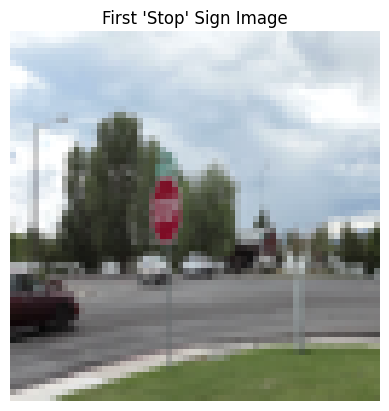

In [5]:
import matplotlib.pyplot as plt

# Display the first 'Stop' sign image
plt.imshow(stop_signs_images[0])
plt.title("First 'Stop' Sign Image")
plt.axis('off')  # Hide axis
plt.show()


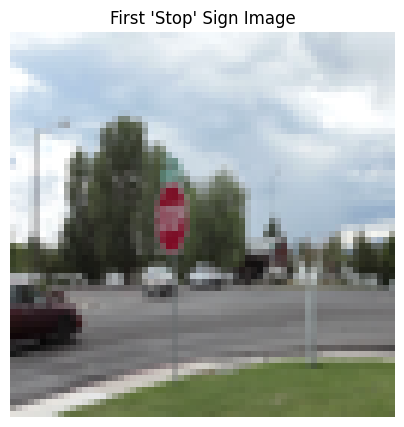

In [6]:
import matplotlib.pyplot as plt

# Display the first 'Stop' sign image with specific dimensions
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(stop_signs_images[0])
plt.title("First 'Stop' Sign Image")
plt.axis('off')  # Hide axis
plt.show()


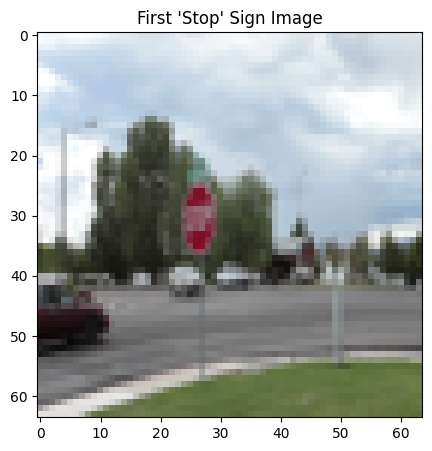

In [7]:
import matplotlib.pyplot as plt

# Display the first 'Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(stop_signs_images[0])
plt.title("First 'Stop' Sign Image")
plt.show()


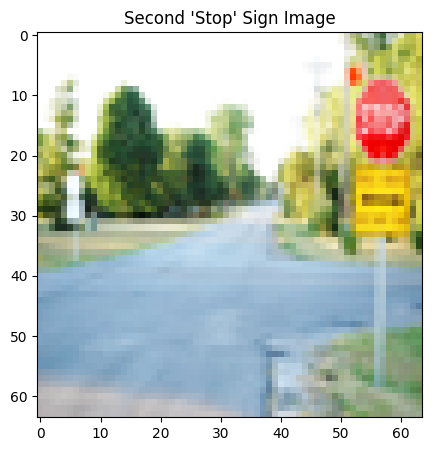

In [8]:
import matplotlib.pyplot as plt

# Display the second 'Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(stop_signs_images[1])
plt.title("Second 'Stop' Sign Image")
plt.show()


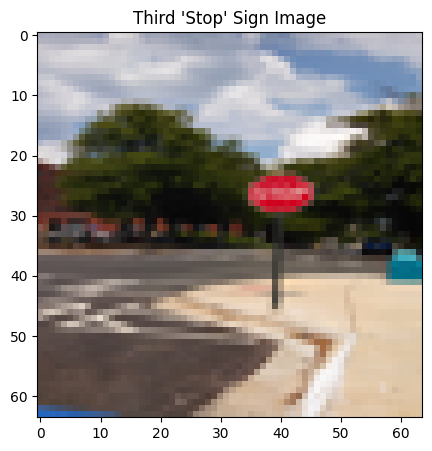

In [9]:
import matplotlib.pyplot as plt

# Display the third 'Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(stop_signs_images[2])
plt.title("Third 'Stop' Sign Image")
plt.show()


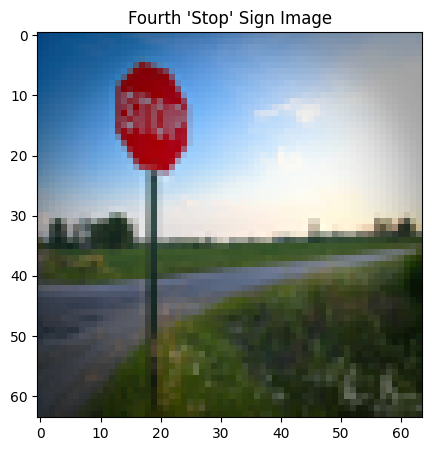

In [10]:
import matplotlib.pyplot as plt

# Display the fourth 'Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(stop_signs_images[3])
plt.title("Fourth 'Stop' Sign Image")
plt.show()


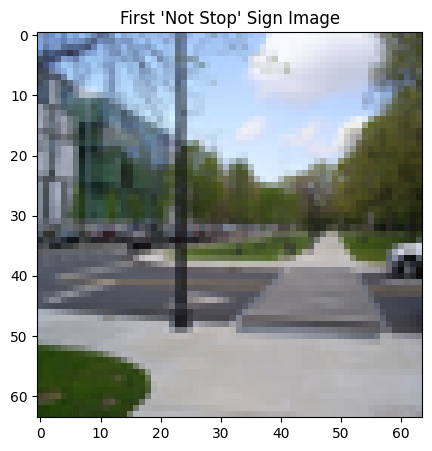

In [11]:
import matplotlib.pyplot as plt

# Display the first 'Not Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(not_stop_signs_images[0])
plt.title("First 'Not Stop' Sign Image")
plt.show()


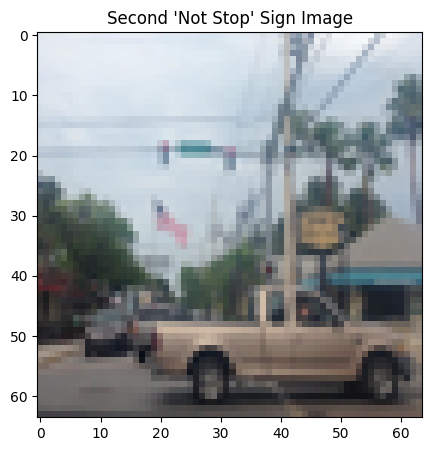

In [12]:
import matplotlib.pyplot as plt

# Display the second 'Not Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(not_stop_signs_images[1])
plt.title("Second 'Not Stop' Sign Image")
plt.show()


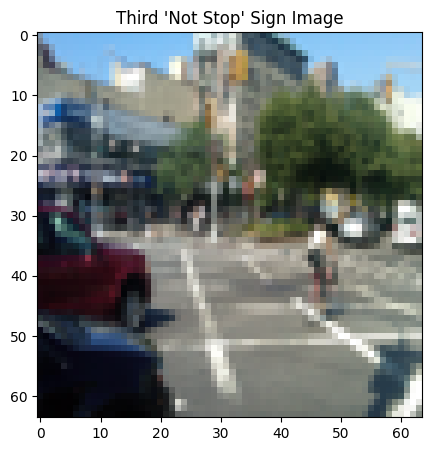

In [14]:
import matplotlib.pyplot as plt

# Display the third 'Not Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(not_stop_signs_images[2])
plt.title("Third 'Not Stop' Sign Image")
plt.show()


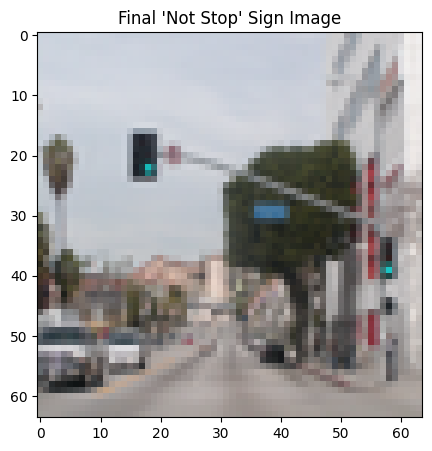

In [15]:
import matplotlib.pyplot as plt

# Display the final 'Not Stop' sign image with axis scales
plt.figure(figsize=(5, 5))  # Set the figure size (width, height)
plt.imshow(not_stop_signs_images[-1])
plt.title("Final 'Not Stop' Sign Image")
plt.show()


1/1 [==============================] - 0s 320ms/step


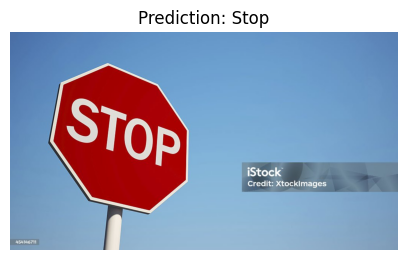

1/1 [==============================] - 0s 25ms/step


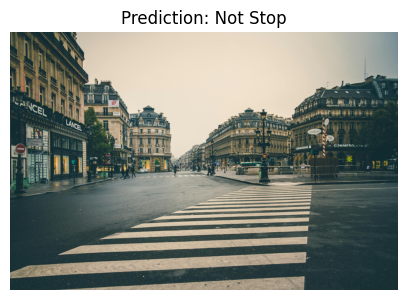

Epoch 1/10
5/5 [==============================] - 0s 36ms/step - loss: 0.3761 - accuracy: 0.8382 - val_loss: 0.4918 - val_accuracy: 0.7941
Epoch 2/10
5/5 [==============================] - 0s 25ms/step - loss: 0.2846 - accuracy: 0.9118 - val_loss: 0.6896 - val_accuracy: 0.6471
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.3212 - accuracy: 0.8603 - val_loss: 0.5300 - val_accuracy: 0.7353
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.2651 - accuracy: 0.8824 - val_loss: 0.6081 - val_accuracy: 0.7647
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.2240 - accuracy: 0.9265 - val_loss: 0.6231 - val_accuracy: 0.7941
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1857 - accuracy: 0.9412 - val_loss: 0.6097 - val_accuracy: 0.7647
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1459 - accuracy: 0.9779 - val_loss: 0.6756 - val_accuracy: 0.7647
Epoch 8/10
5/5 [===========

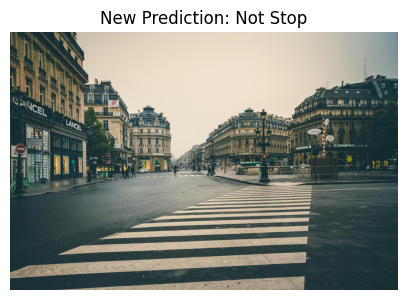

2/2 [==============================] - 0s 9ms/step - loss: 0.7477 - accuracy: 0.6471
New Test Accuracy: 64.71%


In [17]:
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the images
online_image1_path = "/content/online1.jpg"
online_image2_path = "/content/online2.jpg"

online_image1 = Image.open(online_image1_path)
online_image2 = Image.open(online_image2_path)

# Function to classify an image
def classify_image(image, model, image_size):
    img = image.resize(image_size)
    img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    return prediction

# Function to display an image with classification result
def display_classification(image, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Classify the first image
stop_sign_prediction = classify_image(online_image1, model, image_size)
stop_sign_label = "Stop" if np.argmax(stop_sign_prediction) == 1 else "Not Stop"
display_classification(online_image1, f"Prediction: {stop_sign_label}")

# Classify the second image
street_prediction = classify_image(online_image2, model, image_size)
street_label = "Stop" if np.argmax(street_prediction) == 1 else "Not Stop"
display_classification(online_image2, f"Prediction: {street_label}")

# Assuming the classifier misclassifies the street image as a stop sign
misclassified_image = online_image2

# Retrain the model with the existing data (or add more data if available)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Show the new classifier works on the misclassified image
new_prediction = classify_image(misclassified_image, model, image_size)
new_label = "Stop" if np.argmax(new_prediction) == 1 else "Not Stop"
display_classification(misclassified_image, f"New Prediction: {new_label}")

# Print the new test accuracy
new_loss, new_accuracy = model.evaluate(X_test, y_test)
print(f'New Test Accuracy: {new_accuracy * 100:.2f}%')
